In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# XYZ Company has offices in four different zones. The company wishes to
investigate the following :
● The mean sales generated by each zone.
● Total sales generated by all the zones for each month.
● Check whether all the zones generate the same amount of sales.
Help the company to carry out their study with the help of data provided.

In [40]:
data=pd.read_csv('Sales_data_zone_wise.csv')
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [41]:
data.shape

(29, 5)

In [42]:
#The mean sales generated by each zone.
data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

In [43]:
#Total sales generated by all the zones for each month.
data["TotalSales"] = data.sum(axis=1)
print(data)

         Month  Zone - A  Zone - B  Zone - C  Zone - D  TotalSales
0    Month - 1   1483525   1748451   1523308   2267260     7022544
1    Month - 2   1238428   1707421   2212113   1994341     7152303
2    Month - 3   1860771   2091194   1282374   1241600     6475939
3    Month - 4   1871571   1759617   2290580   2252681     8174449
4    Month - 5   1244922   1606010   1818334   1326062     5995328
5    Month - 6   1534390   1573128   1751825   2292044     7151387
6    Month - 7   1820196   1992031   1786826   1688055     7287108
7    Month - 8   1625696   1665534   2161754   2363315     7816299
8    Month - 9   1652644   1873402   1755290   1422059     6703395
9   Month - 10   1852450   1913059   1754314   1608387     7128210
10  Month - 11   2004480   1740365   1317869   1970069     7032783
11  Month - 12   1537539   1875658   1237722   1460165     6111084
12  Month - 13   1254939   1588473   1348629   1733383     5925424
13  Month - 14   1821799   1844081   1617376   1872259     715

In [27]:
# Null hypothesis: Groups means are equal (no variation in means of groups)
#H0: μ1=μ2=…=μp
#Alternative hypothesis: At least, one group mean is different from other groups
#H1: All μ are not equal

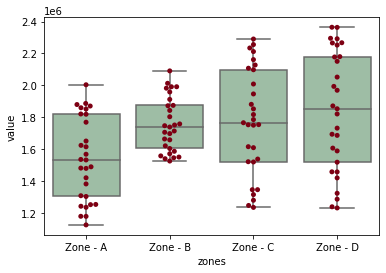

In [28]:
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Zone - A','Zone - B','Zone - C','Zone - D'])

data_melt.columns = ['index', 'zones', 'value']

# Using boxplot, we can easily detect the differences between different Zones
ax = sns.boxplot(x='zones', y='value', data=data_melt, color='#99c2a2')
ax = sns.swarmplot(x='zones', y='value', data=data_melt, color='#7d0013')
plt.show()

In [29]:
print(data_melt)

     index     zones    value
0        0  Zone - A  1483525
1        1  Zone - A  1238428
2        2  Zone - A  1860771
3        3  Zone - A  1871571
4        4  Zone - A  1244922
..     ...       ...      ...
111     24  Zone - D  1695122
112     25  Zone - D  1520406
113     26  Zone - D  1289160
114     27  Zone - D  2178267
115     28  Zone - D  1854412

[116 rows x 3 columns]


In [30]:
# get ANOVA table 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(zones)', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(zones),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


In [32]:
pip install bioinfokit

In [33]:
# ANOVA table using bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data_melt, res_var='value', anova_model='value ~ C(zones)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(zones),3.0,1.483058e+12,4.943525e+11,5.672056,0.001183
Residual,112.0,9.761449e+12,8.715579e+10,NaN,NaN


In [34]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)

res = stat()
res.tukey_hsd(df=data_melt, res_var='value', xfac_var='zones', anova_model='value ~ C(zones)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Zone - A,Zone - B,215066.448276,12856.297302,417276.599250,3.923047,0.032441
1,Zone - A,Zone - C,232377.896552,30167.745578,434588.047526,4.238827,0.017418
2,Zone - A,Zone - D,302433.620690,100223.469716,504643.771664,5.516720,0.001000
3,Zone - B,Zone - C,17311.448276,-184898.702698,219521.599250,0.315780,0.900000
4,Zone - B,Zone - D,87367.172414,-114842.978560,289577.323388,1.593673,0.654049
5,Zone - C,Zone - D,70055.724138,-132154.426836,272265.875112,1.277893,0.778653


In [ ]:
#Since in different ANOVA tests ,p-values are less than critical value null hypothesis is rejected

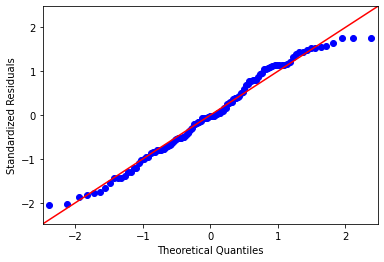

In [35]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA 
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()



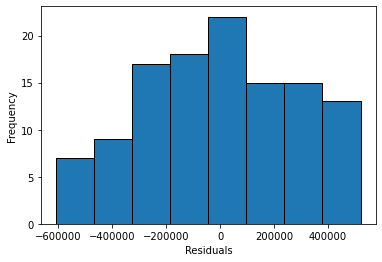

In [36]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [37]:
#Conclusion: We have enough evidence that not all the zones generate the same amount of sales, at 5% significance level.